## Exercises

Note that ***Reading and Understanding the Instructions*** is part of doing your work. This is always true, but especially in this coursework there are places where you will invariably get lost if you don't follow this strategy.

### Exercise 1: Nested lists

If we remove the `sum()` in the code of Exercise 2, we don't compute the sum of list entries, and the output is a list whose entries are themselves lists. 

In [63]:
print([sum([3*k*(k+1)+1 for k in range(n)]) for n in range(5)])
print([    [3*k*(k+1)+1 for k in range(n)]  for n in range(5)])

[0, 1, 8, 27, 64]
[[], [1], [1, 7], [1, 7, 19], [1, 7, 19, 37]]


**Make sure you really understand the above code** (for example, why in the second print statement the first list entry is given by `[]`). 

It might help to pull the code apart a bit more. The code `[3*k*(k+1)+1 for k in range(n)]` gets computed five times, for values of $n$ from $0$ to 4:

In [64]:
print([3*k*(k+1)+1 for k in range(0)])
print([3*k*(k+1)+1 for k in range(1)])
print([3*k*(k+1)+1 for k in range(2)])
print([3*k*(k+1)+1 for k in range(3)])
print([3*k*(k+1)+1 for k in range(4)])

[]
[1]
[1, 7]
[1, 7, 19]
[1, 7, 19, 37]


The five results of these computations then get put into a list, producing the output given above.

Once you you understand what is going on here, you can now test your understanding by trying to create the following three lists of lists using list comprehension.

#### Exercise 1.a: Using list comprehension, create 
$$[[0, 0], [1, 1], [2, 4], [3, 9], [4, 16], [5, 25], [6, 36], [7, 49]]\;,$$ 
$$[[0], [0, 1], [0,1,2], [0,1,2,3], [0,1,2,3,4]]\;,$$
$$[[1], [1, 2], [1,2,3], [1,2,3,4], [1,2,3,4,5], [1,2,3,4,5,6]]\;.$$

**Hint:** if you don't immediately see the patterns, try first using pen and paper to write down some ideas and test them.

In [87]:
print('List 1: ', [[k,k**2] for k in range(8)])
print('\n')
print('List 2: ',[[(k+1)-1 for k in range(n)]for n in range(1,6)])
print('\n')
print('List 3: ',[[(k+1) for k in range(n)]for n in range(1,7)])

List 1:  [[0, 0], [1, 1], [2, 4], [3, 9], [4, 16], [5, 25], [6, 36], [7, 49]]


List 2:  [[0], [0, 1], [0, 1, 2], [0, 1, 2, 3], [0, 1, 2, 3, 4]]


List 3:  [[1], [1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6]]


### Exercise 2: The Mertens function

Similar to our discussion of Euler's totient function $\varphi(n)$, we would like you to look at the Mertens function $M(n)$, which is defined as
$$M(n)=\sum_{k=1}^n\mu(k)$$
where $\mu(k)$ is the Möbius function given by
$$\mu(k)=\begin{cases}0&\text{if $k$ has zero or more repeated prime factors}\\1&\text{if $k=1$}\\-1^j&\text{if $k$ is a product of $j$ distinct primes.}\end{cases}$$

We can import the Möbius function from sympy.

In [66]:
from sympy.ntheory import mobius
print([mobius(k) for k in range(1,100)])

[1, -1, -1, 0, -1, 1, -1, 0, 0, 1, -1, 0, -1, 1, 1, 0, -1, 0, -1, 0, 1, 1, -1, 0, 0, 1, 0, 0, -1, -1, -1, 0, 1, 1, 1, 0, -1, 1, 1, 0, -1, -1, -1, 0, 0, 1, -1, 0, 0, 0, 1, 0, -1, 0, 1, 0, 1, 1, -1, 0, -1, 1, 0, 0, 1, -1, -1, 0, 1, -1, -1, 0, -1, 1, 0, 0, 1, -1, -1, 0, 0, 1, -1, 0, 1, 1, 1, 0, -1, 0, 1, 0, 1, 1, 1, 0, -1, 0, 0]


### Exercise 2.a: Reproduce the plot of the Mertens function shown below

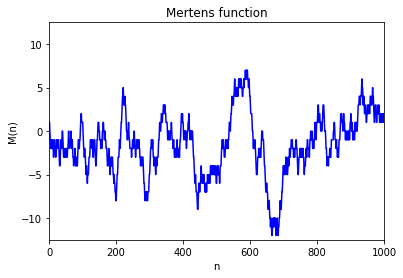

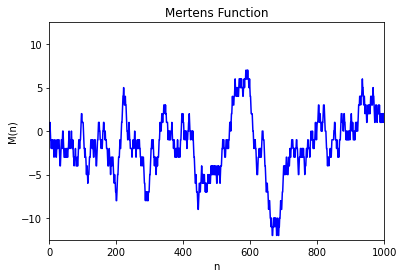

In [67]:
import matplotlib.pyplot as plt
x = list(range(0,1000))
y = [sum([mobius(k) for k in range(1,n)]) for n in range(1000)]

plt.xlim([0,1000])
plt.ylim([-12.5,12.5])
plt.xlabel('n')
plt.ylabel('M(n)')
plt.title('Mertens Function')
plt.plot(x,y,c='blue')

plt.show()

### Exercise 3: Convergence and Divergence of Infinite Sums

The Taylor series $$\log(1+x)=\sum_{k=1}^\infty\frac{(-1)^{k-1}}kx^k$$ converges for $-1<x<1$. The question of convergence and divergence at $x=1$ and $x=-1$ is subtle.

#### Exercise 3.a: To study numerically the behaviour of the partial sums for $x=1$ and $x=-1$, create plots of the first $1000$ partial sums $$\sum_{k=1}^n\frac{(-1)^{k-1}}k\quad\text{and}\quad\sum_{k=1}^n\frac1k$$ versus $\log(n)$.

Remember that in order to plot points, you need to create a list of $x$-coordinates and a list of $y$-coordinates of the points you want to plot. Here the $x$-coordinates are given by $\log(n)$ and the $y$-coordinates by the partial sums of the first $n$ terms.

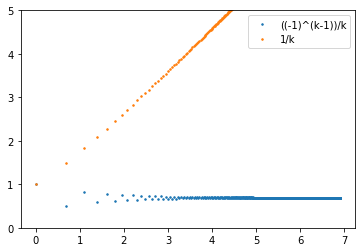

In [107]:
import math
x = [math.log(n) for n in range(1, 1000)]
y_0 = [sum([((-1)**(k-1))/k for k in range(1,n+1)]) for n in range(1,1000)]
y_1 = [sum([1/k for k in range(1,n+1)]) for n in range(1,1000)]


plt.ylim([0,5])
plt.plot(x, y_0, ".", markersize=3, label='((-1)^(k-1))/k')
plt.plot(x, y_1, ".", markersize=3, label='1/k')
plt.legend()

plt.show()

#### Exercise 3.b: What do the plots suggest about the convergence of the infinite sums for $x=1$ and $x=-1$?

It seems that the infinite sum diverges for x=-1 and converges for x=1.

### Exercise 4: More on the Riemann Zeta Function

This is a continuation of last week's exercise, to do more numerical computations using our improved knowledge of Python. Recall the two expressions of the Riemann Zeta function 
$$\zeta(s)=\sum_{n=1}^\infty\frac1{n^s}\;.$$
$\zeta(s)$ also can be expressed as an infinite product over all primes,
$$\zeta(s)=\prod_p\left(\frac1{1-p^{-s}}\right)\;,$$
where the product is over the primes $p=2,3,5,7,11,13,\ldots$. 

Last week you computed a few partial sums and partial products using up to six terms. Using list comprehension, we can simplify the code quite considerably.

#### Exercise 4.a: Compute the $100$th, $200$th and $400$th partial sums for $s=2,3,4$. For $s=2$ and $s=4$, compare against the exactly known values. For $s=3$, an exact value is not known, so we need to use the function `zeta` from the `scipy` module to compare (you used this one last week). How many digits agreement do you find with the $400$th partial sums?

In [85]:
from sympy import prime
import scipy.special
zeta=scipy.special.zeta

def zeta_sum(r, s):
    summation = 0
    for n in range(1, r+1):     
        a = 1/(n**s)
        summation = summation + a
    return summation

for r in [100,200,400]:
    print(f'The {r}th partial sum for s = 2 is ' + str(zeta_sum(r, 2)))
    print(f'The {r}th partial sum for s = 3 is ' + str(zeta_sum(r, 3)))
    print(f'The {r}th partial sum for s = 4 is ' + str(zeta_sum(r, 4)))
    print('\n') 

print('The exact value of the Riemann zeta fucntion at s = 2 is: ' + str((math.pi**2)/6))
print('The exact value of the Riemann zeta fucntion at s = 3 is: ' + str(zeta(3)))
print('The exact value of the Riemann zeta fucntion at s = 4 is: ' + str((math.pi**4)/90))

The 100th partial sum for s = 2 is 1.6349839001848923
The 100th partial sum for s = 3 is 1.2020074006596781
The 100th partial sum for s = 4 is 1.0823229053444727


The 200th partial sum for s = 2 is 1.6399465460149971
The 200th partial sum for s = 3 is 1.2020444655033462
The 200th partial sum for s = 4 is 1.082323192355929


The 400th partial sum for s = 2 is 1.6424371892440628
The 400th partial sum for s = 3 is 1.2020537859623281
The 400th partial sum for s = 4 is 1.0823232285223028


The exact value of the Riemann zeta fucntion at s = 2 is: 1.6449340668482264
The exact value of the Riemann zeta fucntion at s = 3 is: 1.2020569031595942
The exact value of the Riemann zeta fucntion at s = 4 is: 1.082323233711138


### For the 400th partial sum:

- at s = 2 we find 3 digits of agreement.
- at s = 3 we find 6 digits of agreement.
- at s = 4 we find 8 digits of agreement.

For the product formula we need an easy way of accessing the $n$-th prime. Fortunately, there already exists a prime function in a Python module (you can find stuff like this with Google) which we can access using `from sympy import prime`.

#### Exercise 4.b: Using `prime()`, print a list of the first $20$ prime numbers, and print the $1000$th prime number.

In [71]:
primes_list = []

for n in range(1, 20):
    primes_list.append(prime(n))

        
print('The the first 20 primes are: ', primes_list)
print('The 1000th prime is: ', prime(1000))

The the first 20 primes are:  [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67]
The 1000th prime is:  7919


Similarly to summing up numbers in a list, we can multiply them as well, using 'numpy.prod()' instead of 'sum()'.

#### Exercise 4.c: Compute the $100$th, $200$th and $400$th partial products for $s=2,3,4$., and compare against the known values. How many digits agreement do you find with the $400$th partial products?

You will notice that your code takes considerably more time to execute, due to the need to repeatedly use multiplication, division, powers, and calling `prime()`. 

In [72]:
primes_list = []

for n in range(2, 101):         
    primes_list.append(prime(n))

for s in [2,3,4]:
    
    product = 1/(1-2**(-s))
    for p in primes_list:
        b = 1 / (1-p**(-s))
        product = product * b
    print(f'The 100th partial product for s = {s} is {product}')

print('\n')
primes_list = []

for n in range(2, 201):         
    primes_list.append(prime(n))

for s in [2,3,4]:
    
    product = 1/(1-2**(-s))
    for p in primes_list:
        b = 1 / (1-p**(-s))
        product = product * b
    print(f'The 200th partial product for s = {s} is {product}')
    
print('\n')    
primes_list = []

for n in range(2, 401):         
    primes_list.append(prime(n))

for s in [2,3,4]:
    
    product = 1/(1-2**(-s))
    for p in primes_list:
        b = 1 / (1-p**(-s))
        product = product * b
    print(f'The 400th partial product for s = {s} is {product}')
    
print('\n')    
print('The exact value of the Riemann zeta fucntion at s = 2 is: ' + str((math.pi**2)/6))
print('The exact value of the Riemann zeta fucntion at s = 3 is: ' + str(zeta(3)))
print('The exact value of the Riemann zeta fucntion at s = 4 is: ' + str((math.pi**4)/90))

The 100th partial product for s = 2 is 1.6445152217242918
The 100th partial product for s = 3 is 1.2020566021795083
The 100th partial product for s = 4 is 1.082323233369198


The 200th partial product for s = 2 is 1.6447685061588626
The 200th partial product for s = 3 is 1.2020568511172716
The 200th partial product for s = 4 is 1.0823232336851547


The 400th partial product for s = 2 is 1.644867084167859
The 400th partial product for s = 3 is 1.202056893843724
The 400th partial product for s = 4 is 1.0823232337090953


The exact value of the Riemann zeta fucntion at s = 2 is: 1.6449340668482264
The exact value of the Riemann zeta fucntion at s = 3 is: 1.2020569031595942
The exact value of the Riemann zeta fucntion at s = 4 is: 1.082323233711138


## Submit your Jupyter Notebook to QMPLUS

Once you are done, save the jupyter notebook and submit it to QMPLUS under Lab Report Week 3.